<a href="https://colab.research.google.com/github/parnian91/NLP_ChatBot/blob/main/nlp_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='#FFE15D'><b>💎 Project : ChatBot (QA Bot) </b></font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

## 🔴 Get the data

In [ ]:
!pip install datasets

In [ ]:
from sklearn import datasets
import datasets

In [ ]:
# Load the bAbI QA dataset with a specific configuration (e.g., 'en-10k-qa1')
dataset = datasets.load_dataset("facebook/babi_qa", "en-10k-qa1")

### A story starts from line 1 to line 15. Every 3rd line, there is story(2), question(1) & answer.

In [ ]:
dataset['train']

Dataset({
    features: ['story'],
    num_rows: 2000
})

In [ ]:
dataset['test']

Dataset({
    features: ['story'],
    num_rows: 200
})

In [ ]:
dataset['train']['story'][0]

{'id': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15'],
 'type': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
 'text': ['Mary moved to the bathroom.',
  'John went to the hallway.',
  'Where is Mary?',
  'Daniel went back to the hallway.',
  'Sandra moved to the garden.',
  'Where is Daniel?',
  'John moved to the office.',
  'Sandra journeyed to the bathroom.',
  'Where is Daniel?',
  'Mary moved to the hallway.',
  'Daniel travelled to the office.',
  'Where is Daniel?',
  'John went back to the garden.',
  'John moved to the bedroom.',
  'Where is Sandra?'],
 'supporting_ids': [[],
  [],
  ['1'],
  [],
  [],
  ['4'],
  [],
  [],
  ['4'],
  [],
  [],
  ['11'],
  [],
  [],
  ['8']],
 'answer': ['',
  '',
  'bathroom',
  '',
  '',
  'hallway',
  '',
  '',
  'hallway',
  '',
  '',
  'office',
  '',
  '',
  'bathroom']}

In [ ]:
dataset['train']['story'][1]['text']

['Sandra travelled to the office.',
 'Sandra went to the bathroom.',
 'Where is Sandra?',
 'Mary went to the bedroom.',
 'Daniel moved to the hallway.',
 'Where is Sandra?',
 'John went to the garden.',
 'John travelled to the office.',
 'Where is Sandra?',
 'Daniel journeyed to the bedroom.',
 'Daniel travelled to the hallway.',
 'Where is John?',
 'John went to the bedroom.',
 'John travelled to the office.',
 'Where is Daniel?']

In [ ]:
dataset['train']['story'][0]['text'][0]

'Mary moved to the bathroom.'

In [ ]:
dataset['train']['story'][0]['text'][1]

'John went to the hallway.'

In [ ]:
dataset['train']['story'][0]['text'][2]

'Where is Mary?'

In [ ]:
dataset['train']['story'][0]['answer']

['',
 '',
 'bathroom',
 '',
 '',
 'hallway',
 '',
 '',
 'hallway',
 '',
 '',
 'office',
 '',
 '',
 'bathroom']

In [ ]:
Answers = dataset['train']['story'][0]['answer']
Answers = [item for item in Answers if item]
Answers

['bathroom', 'hallway', 'hallway', 'office', 'bathroom']

In [ ]:
#!pip install nltk

## 🔴 Pre-processing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
# Function extracts sub-stories within a story and creates tuples

nltk.download('punkt')  # Download the punkt tokenizer data

def tokenize_sentence(sentence):
    return word_tokenize(sentence)

def process_babi_dataset(dataset):
    result = []

    for example in dataset:
        story = example['story']['text']
        answer = example['story']['answer']
        answers = [item for item in answer if item]

        i = 0
        while i < len(story):
            segment = []
            while i < len(story) and not story[i].endswith('?'):
                segment.extend(tokenize_sentence(story[i]))
                i += 1

            if i < len(story):
                question = tokenize_sentence(story[i])
                answer = answers.pop(0)

                result.append((segment, question, answer))

            i += 1

    return result


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data_train = process_babi_dataset(dataset['train'])

In [ ]:
data_train[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'John',
  'went',
  'to',
  'the',
  'hallway',
  '.'],
 ['Where', 'is', 'Mary', '?'],
 'bathroom')

In [ ]:
len(data_train)

10000

In [ ]:
data_test = process_babi_dataset(dataset['test'])

In [ ]:
data_test[0]

(['John',
  'travelled',
  'to',
  'the',
  'hallway',
  '.',
  'Mary',
  'journeyed',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Where', 'is', 'John', '?'],
 'hallway')

In [ ]:
len(data_test)

1000

In [ ]:
' '.join(data_train[0][0])

'Mary moved to the bathroom . John went to the hallway .'

In [ ]:
' '.join(data_train[0][1])

'Where is Mary ?'

In [ ]:
data_train[0][2]

'bathroom'

## 🔴 Build a vocab & Vectorization of stories

In [ ]:
all_data = data_train + data_test

In [ ]:
len(all_data)

11000

In [ ]:
vocab = set()
for story, q, answer in all_data:
    vocab |= set(story + q + [answer])

# sorting the vocabulary
vocab = sorted(vocab)

In [ ]:
vocab

['.',
 '?',
 'Daniel',
 'John',
 'Mary',
 'Sandra',
 'Where',
 'back',
 'bathroom',
 'bedroom',
 'garden',
 'hallway',
 'is',
 'journeyed',
 'kitchen',
 'moved',
 'office',
 'the',
 'to',
 'travelled',
 'went']

In [ ]:
len(vocab)

21

In [ ]:
vocab_len = len(vocab) + 1

In [ ]:
vocab_len

22

In [ ]:
all_srory_lens = [len(data[0]) for data in all_data]

In [ ]:
story_maxlen = max(all_srory_lens)
story_maxlen

14

In [ ]:
all_question_lens = [len(data[1]) for data in all_data]

In [ ]:
question_maxlen = max(all_question_lens)
question_maxlen

4

In [ ]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'.': 1,
 '?': 2,
 'daniel': 3,
 'john': 4,
 'mary': 5,
 'sandra': 6,
 'where': 7,
 'back': 8,
 'bathroom': 9,
 'bedroom': 10,
 'garden': 11,
 'hallway': 12,
 'is': 13,
 'journeyed': 14,
 'kitchen': 15,
 'moved': 16,
 'office': 17,
 'the': 18,
 'to': 19,
 'travelled': 20,
 'went': 21}

In [ ]:
train_story_text = []
train_question_text = []
train_answer = []

for story, q, answer in data_train:
    train_story_text.append(story)
    train_question_text.append(q)
    train_answer.append(answer)

In [ ]:
#train_story_text

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_seq)

10000

In [ ]:
data_train[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'John',
 'went',
 'to',
 'the',
 'hallway',
 '.']

In [ ]:
train_story_seq[0]

[5, 16, 19, 18, 9, 1, 4, 21, 19, 18, 12, 1]

In [ ]:
def vectorize_stories(data, word_idx=tokenizer.word_index, story_maxlen=story_maxlen, question_maxlen=question_maxlen):
    # story vector initialization
    X = []
    # question vector initialization
    Xq = []
    # answer vector intialization
    Y = []
    for story, q, answer in data:
        # creating list of story word indices
        x = [word_idx[w.lower()] for w in story]
        # creating list of question word indices
        xq = [word_idx[w.lower()] for w in q]
        # let's not forget that index 0 is reserved
        y = np.zeros(len(word_idx) + 1)
        # creating label 1 for the answer word index
        y[word_idx[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=story_maxlen),
            pad_sequences(Xq, maxlen=question_maxlen), np.array(Y))

In [ ]:
# vectorize train story, query and answer sentences/word using vocab
inputs_train, queries_train, answers_train = vectorize_stories(data_train)

In [ ]:
# vectorize test story, query and answer sentences/word using vocab
inputs_test, queries_test, answers_test = vectorize_stories(data_test)

In [ ]:
inputs_train

array([[ 0,  0,  5, ..., 18, 12,  1],
       [ 0,  3, 21, ..., 18, 11,  1],
       [ 0,  0,  4, ..., 18,  9,  1],
       ...,
       [ 6, 21,  8, ..., 18, 15,  1],
       [ 0,  3, 21, ..., 18,  9,  1],
       [ 0,  4, 21, ..., 18, 10,  1]], dtype=int32)

In [ ]:
queries_train

array([[ 7, 13,  5,  2],
       [ 7, 13,  3,  2],
       [ 7, 13,  3,  2],
       ...,
       [ 7, 13,  5,  2],
       [ 7, 13,  4,  2],
       [ 7, 13,  4,  2]], dtype=int32)

In [ ]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
inputs_train[0]

array([ 0,  0,  5, 16, 19, 18,  9,  1,  4, 21, 19, 18, 12,  1],
      dtype=int32)

In [ ]:
queries_train[0]

array([ 7, 13,  5,  2], dtype=int32)

In [ ]:
answers_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
inputs_train[1]

array([ 0,  3, 21,  8, 19, 18, 12,  1,  6, 16, 19, 18, 11,  1],
      dtype=int32)

In [ ]:
inputs_train[2]

array([ 0,  0,  4, 16, 19, 18, 17,  1,  6, 14, 19, 18,  9,  1],
      dtype=int32)

In [ ]:
answers_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
tokenizer.word_index['bathroom']

9

In [ ]:
tokenizer.word_index['bedroom']

10

In [ ]:
tokenizer.word_index['garden']

11

In [ ]:
tokenizer.word_index['hallway']

12

In [ ]:
tokenizer.word_index['kitchen']

15

In [ ]:
tokenizer.word_index['office']

17

In [ ]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 149., 171.,
       187., 154.,   0.,   0., 157.,   0., 182.,   0.,   0.,   0.,   0.])

In [ ]:
queries_train[0]

array([ 7, 13,  5,  2], dtype=int32)

## 🔴 Define and Train the model
* End-To-End Memory Networks
####  Assume we have input context C and memory M represented as vectors or sequences
#### You may need to preprocess your data to obtain embeddings, for example, using word embeddings for text data

#### Context Embedding (Embedding C)
#### Memory Embedding (Embedding M)

https://arxiv.org/pdf/1503.08895.pdf

In [ ]:
#!pip install tensorflow
# or
#!pip install keras

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Activation, Dense, Dropout, Permute, add, dot, concatenate, LSTM

In [ ]:
# placeholders, shape(story_maxlen, batch_size)
input_sequence = Input((story_maxlen,))
# shape(question_maxlen, batch_size)
question = Input((question_maxlen,))

print('Input sequence:', input_sequence)
print('Question:', question)

Input sequence: KerasTensor(type_spec=TensorSpec(shape=(None, 14), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
Question: KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [ ]:
# number of epochs to run
train_epochs = 50
# Training batch size
batch_size = 32
# Hidden embedding size
embed_size = 64
# number of nodes in LSTM layer
lstm_size = 64
# dropout rate
dropout_rate = 0.3

In [ ]:
# encoder M
# embed the input sequence into a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,
                              output_dim=embed_size))
input_encoder_m.add(Dropout(dropout_rate))
# output: (samples, story_maxlen, embedding_dim)

In [ ]:
# encoder C
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,
                              output_dim=question_maxlen))
input_encoder_c.add(Dropout(dropout_rate))
# output: (samples, story_maxlen, query_maxlen)

In [ ]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,
                               output_dim=embed_size,
                               input_length=question_maxlen))
question_encoder.add(Dropout(dropout_rate))
# output: (samples, query_maxlen, embedding_dim)

In [ ]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
print('Input encoded m', input_encoded_m)
input_encoded_c = input_encoder_c(input_sequence)
print('Input encoded c', input_encoded_c)
question_encoded = question_encoder(question)
print('Question encoded', question_encoded)

Input encoded m KerasTensor(type_spec=TensorSpec(shape=(None, 14, 64), dtype=tf.float32, name=None), name='sequential_3/dropout_4/Identity:0', description="created by layer 'sequential_3'")
Input encoded c KerasTensor(type_spec=TensorSpec(shape=(None, 14, 4), dtype=tf.float32, name=None), name='sequential_4/dropout_5/Identity:0', description="created by layer 'sequential_4'")
Question encoded KerasTensor(type_spec=TensorSpec(shape=(None, 4, 64), dtype=tf.float32, name=None), name='sequential_5/dropout_6/Identity:0', description="created by layer 'sequential_5'")


In [ ]:
# compute a 'match' between the first input vector sequence
# and the question vector sequence
# shape: `(samples, story_maxlen, query_maxlen)
    ### Attention
match = dot([input_encoded_m, question_encoded], axes=-1, normalize=False)
print(match.shape)
match = Activation('softmax')(match)
print('Match shape', match)

(None, 14, 4)
Match shape KerasTensor(type_spec=TensorSpec(shape=(None, 14, 4), dtype=tf.float32, name=None), name='activation_2/Softmax:0', description="created by layer 'activation_2'")


In [ ]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)
print('Response shape', response)

Response shape KerasTensor(type_spec=TensorSpec(shape=(None, 4, 14), dtype=tf.float32, name=None), name='permute_1/transpose:0', description="created by layer 'permute_1'")


In [ ]:
# concatenate the response vector with the question vector sequence
answer = concatenate([response, question_encoded])
print('Answer shape', answer)

Answer shape KerasTensor(type_spec=TensorSpec(shape=(None, 4, 78), dtype=tf.float32, name=None), name='concatenate_1/concat:0', description="created by layer 'concatenate_1'")


In [ ]:
answer = LSTM(lstm_size)(answer)  # Generate tensors of shape 32
answer = Dropout(dropout_rate)(answer)
answer = Dense(vocab_len)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

In [ ]:
# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 14)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 sequential_3 (Sequential)   (None, None, 64)             1408      ['input_3[0][0]']             
                                                                                                  
 sequential_5 (Sequential)   (None, 4, 64)                1408      ['input_4[0][0]']             
                                                                                            

## 🔴 Training the Model

In [ ]:
# start training the model
history = model.fit([inputs_train, queries_train], answers_train,
                    batch_size=batch_size,
                    epochs=train_epochs,
                    validation_data=([inputs_test, queries_test], answers_test))

# save model
model.save('model.h5')

Epoch 1/50
313/313 [==============================] - 12s 18ms/step - loss: 1.9044 - accuracy: 0.1718 - val_loss: 1.7828 - val_accuracy: 0.2040
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7366 - accuracy: 0.2512 - val_loss: 1.6141 - val_accuracy: 0.3630
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 1.5915 - accuracy: 0.3706 - val_loss: 1.5079 - val_accuracy: 0.4120
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5408 - accuracy: 0.4077 - val_loss: 1.5119 - val_accuracy: 0.4240
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5216 - accuracy: 0.4190 - val_loss: 1.4758 - val_accuracy: 0.4390
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.4998 - accuracy: 0.4376 - val_loss: 1.4403 - val_accuracy: 0.4820
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.4748 - accuracy: 0.4535 - val_loss: 1.4054 - val_accuracy: 0.5040
Epo

##🔴 Model evaluation

####🔴 Visualization of history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


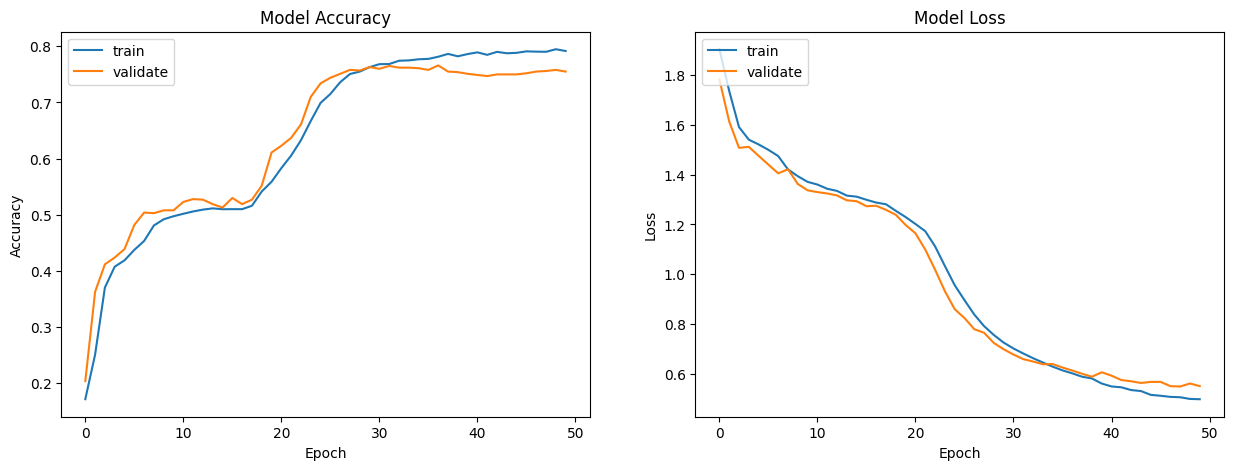

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

## 🔴Test of model

In [ ]:
prediction = model.predict([inputs_test, queries_test])

32/32 [==============================] - 1s 3ms/step


In [ ]:
prediction

array([[1.6098449e-08, 2.0856040e-08, 1.8642996e-08, ..., 1.8174038e-08,
        1.9399556e-08, 1.2956827e-08],
       [6.0979382e-05, 7.8630881e-05, 7.8694866e-05, ..., 8.8410437e-05,
        8.3662708e-05, 9.3816525e-05],
       [1.1861916e-07, 2.2414935e-07, 1.6441524e-07, ..., 1.4940098e-07,
        1.3599572e-07, 1.1930804e-07],
       ...,
       [3.1043083e-07, 3.1235012e-07, 4.8020303e-07, ..., 4.3480270e-07,
        4.2306453e-07, 3.6340771e-07],
       [2.5125055e-09, 1.4227819e-09, 1.6184004e-09, ..., 1.6949114e-09,
        2.9457992e-09, 2.6307492e-09],
       [5.4160639e-05, 4.4908629e-05, 5.0714702e-05, ..., 4.9031987e-05,
        6.4831875e-05, 5.2958971e-05]], dtype=float32)

In [ ]:
data_test[0][0]

['John',
 'travelled',
 'to',
 'the',
 'hallway',
 '.',
 'Mary',
 'journeyed',
 'to',
 'the',
 'bathroom',
 '.']

In [ ]:
data_test[0][1]

['Where', 'is', 'John', '?']

In [ ]:
data_test[0][2]

'hallway'

In [ ]:
prediction[0]

array([1.60984488e-08, 2.08560405e-08, 1.86429965e-08, 1.68833907e-08,
       1.16346008e-08, 1.19105525e-08, 1.46071493e-08, 1.64793956e-08,
       1.46737769e-08, 8.83827975e-04, 1.75651372e-03, 4.59496572e-04,
       9.90774035e-01, 1.28783046e-08, 1.32260922e-08, 5.63150784e-03,
       1.49607668e-08, 4.94371343e-04, 1.81365003e-08, 1.81740383e-08,
       1.93995557e-08, 1.29568267e-08], dtype=float32)

In [ ]:
val_max = np.argmax(prediction[0])

In [ ]:
for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'hallway'

In [ ]:
prediction[0][val_max]

0.99077404

In [ ]:
vocab

['.',
 '?',
 'Daniel',
 'John',
 'Mary',
 'Sandra',
 'Where',
 'back',
 'bathroom',
 'bedroom',
 'garden',
 'hallway',
 'is',
 'journeyed',
 'kitchen',
 'moved',
 'office',
 'the',
 'to',
 'travelled',
 'went']

In [ ]:
my_story = 'John went to the kitchen . Sandra moved to the office .'

In [ ]:
my_story.split()

['John',
 'went',
 'to',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'moved',
 'to',
 'the',
 'office',
 '.']

In [ ]:
my_question = 'Where is Sandra ?'

In [ ]:
my_question.split()

['Where', 'is', 'Sandra', '?']

In [ ]:
my_data = [(my_story.split(), my_question.split(), 'office')]

In [ ]:
my_data

[(['John',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'moved',
   'to',
   'the',
   'office',
   '.'],
  ['Where', 'is', 'Sandra', '?'],
  'office')]

In [ ]:
my_story, my_q, my_ans = vectorize_stories(my_data)

In [ ]:
my_story

array([[ 0,  0,  4, 21, 19, 18, 15,  1,  6, 16, 19, 18, 17,  1]],
      dtype=int32)

In [ ]:
my_q

array([[ 7, 13,  6,  2]], dtype=int32)

In [ ]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.]])

In [ ]:
pred = model.predict([my_story, my_q])

1/1 [==============================] - 0s 29ms/step


In [ ]:
val_max = np.argmax(pred[0])

In [ ]:
for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'office'

In [ ]:
pred[0][val_max]

0.9986552